## Feature Selection and Engineering

This section contains notes about feature selection and engineering for the final model for this project.  

It also keeps track of decisions and thoughts for other exploration. 

In [1]:
import pandas as pd

In [2]:
model = pd.read_csv('../../data/final_model_ALL_20230526.csv')
model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31437 entries, 0 to 31436
Data columns (total 28 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   code_module                                 31437 non-null  object 
 1   code_presentation                           31437 non-null  object 
 2   id_student                                  31437 non-null  int64  
 3   gender                                      31437 non-null  object 
 4   region                                      31437 non-null  object 
 5   highest_education                           31437 non-null  object 
 6   imd_band                                    31437 non-null  object 
 7   age_band                                    31437 non-null  object 
 8   num_of_prev_attempts                        31437 non-null  int64  
 9   studied_credits                             31437 non-null  int64  
 10  disability

The model which I want to construct and explore centres around the prediction of student outcomes from their academic performance.  As such, the dataset needs to be modified.

I have considered different research questions and models to explore.  These are out of scope for this project but listed here for future reference:

* Student profiles via clustering
  * What are the different student profiles, if any?
  * What are the key features of each profile?
  * How do these profiles relate to student outcomes?
  * Should we be targeting different groups of students differently?
  * Should they be part of a predictive model?
  * What are the implications?  Bias, ethical, discriminatory, intervention, etc.

* Predicting student outcomes with / without student profiles
  * Which features are relevant, important, or predictive?
  * What difference do they make, if any?

* Model using one year (2013) and predicting (2014) vs Model using all years (2013-14) and predicting (2015)
  * Adding new data to the model in a self-recursive manner

* Model with other features which have been excluded
  * Assessment types
  * VLE types
  * Student demographics (as above)
  * Intake months

* Feature reduction
  * PCA
  * LDA
  * Other

* Feature engineering
  * New features from existing features or other data

* Single generalised model vs multiple specific models (i.e. by course, student profile)
  * Which performs better?
  * Does an institution need its own models or does a generalised model work well enough?
  * Are models generalisable globally, geographically, locally, instituationaly, etc.?


 

### Correlations

I explored correlations with all features in a separate notebook before scaling back to something more proportionate for this project.  (Categorical variables were one-hot or ordinally encoded.)

One plot is the one below:

![Correlation Heatmap](../../_images/correlation_heat.png)

It shows that there are some highly correlated features (engagement data in bottom right hand corner) and a lot of features which are not correlated.

For further information please see - [../V1/model_03_correlations](../V1/model_03_correlations.ipynbmodel_03_correlations.ipynb).

#### This model

Initial decisions for this model are:

| Index | Variable                           | Keep Initially | Will Remove for Modelling but May Be Needed for Datasplitting |
|-------|------------------------------------|----------------|-------------------------------------------------------------|
| 0     | code_module                        | Keep           |                                                             |
| 1     | code_presentation                  | Remove         | Want to Generalise                                          |
| 2     | id_student                         | Remove         | Not a Feature                                               |
| 3     | gender                             | Remove         | Student Bio                                                 |
| 4     | region                             | Remove         | Student Bio                                                 |
| 5     | highest_education                  | Remove         | Student Bio                                                 |
| 6     | imd_band                           | Remove         | Student Bio                                                 |
| 7     | age_band                           | Remove         | Student Bio                                                 |
| 8     | num_of_previous_attempts           | Keep           | Academic History                                           |
| 9     | studied_credits                    | Keep           | Academic History                                           |
| 10    | disability                         | Remove         | Student Bio                                                 |
| 11    | course_length                      | Remove         | Not Useful                                                  |
| 12    | date_registration                  | Keep Initially | Keep Initially                                             |
| 13    | date_unregistration                | Keep Initially | Keep Initially - Needed for Prediction Data Split           |
| 14    | unregistration_before_registration | Remove         | Not Needed                                                  |
| 15    | unregistration_before_registration_14_days | Remove         | Not Needed                                                  |
| 16    | prop_submissions                   | Keep           | Engagement                                                  |
| 17    | avg_score                          | Keep           | Engagement                                                  |
| 18    | submission_distance                | Keep           | Engagement                                                  |
| 19    | stu_activity_count                 | Keep           | Engagement                                                  |
| 20    | stu_activity_type_count            | Keep           | Engagement                                                  |
| 21    | stu_total_clicks                   | Keep           | Engagement                                                  |
| 22    | stu_days_active                    | Keep           | Engagement                                                  |
| 23    | mod_pres_vle_type_count            | Remove         | Not Useful                                                  |
| 24    | year                               | Remove         | Not Needed for this Model                                   |
| 25    | month                              | Remove         | Not Needed for this Model                                   |
| 26    | subject                            | Keep           | Keep Initially                                             |
| 27    | final_result                       | Keep           | Target                                                      |


In [5]:

# columns to drop
columns_to_drop = ['code_presentation', 'id_student', 'gender', 'region', 'highest_education', 'imd_band',
                   'age_band', 'disability', 'course_length', 'unregistration_before_registration',
                   'unregistration_before_registration_14_days', 'mod_pres_vle_type_count', 'year', 'month']

# drop columns
model = model.drop(columns=columns_to_drop)


In [6]:
model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31437 entries, 0 to 31436
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   code_module              31437 non-null  object 
 1   num_of_prev_attempts     31437 non-null  int64  
 2   studied_credits          31437 non-null  int64  
 3   date_registration        31437 non-null  float64
 4   date_unregistration      31437 non-null  float64
 5   prop_submissions         31437 non-null  float64
 6   avg_score                31437 non-null  float64
 7   submission_distance      31437 non-null  float64
 8   stu_activity_count       31437 non-null  float64
 9   stu_activity_type_count  31437 non-null  float64
 10  stu_total_clicks         31437 non-null  float64
 11  stu_days_active          31437 non-null  float64
 12  subject                  31437 non-null  object 
 13  final_result             31437 non-null  object 
dtypes: float64(9), int64(2

 Initial decisions:

 
| Index | Variable                           | Keep Initially | Will Remove for Modelling but May Be Needed for Datasplitting |
|-------|------------------------------------|----------------|-------------------------------------------------------------|
| 0     | code_module                        | Keep           |                                                             |
| 1     | code_presentation                  | Remove         | Want to Generalise                                          |
| 2     | id_student                         | Remove         | Not a Feature                                               |
| 3     | gender                             | Remove         | Student Bio                                                 |
| 4     | region                             | Remove         | Student Bio                                                 |
| 5     | highest_education                  | Remove         | Student Bio                                                 |
| 6     | imd_band                           | Remove         | Student Bio                                                 |
| 7     | age_band                           | Remove         | Student Bio                                                 |
| 8     | num_of_previous_attempts           | Keep           | Academic History                                           |
| 9     | studied_credits                    | Keep           | Academic History                                           |
| 10    | disability                         | Remove         | Student Bio                                                 |
| 11    | course_length                      | Remove         | Not Useful                                                  |
| 12    | date_registration                  | Keep Initially | Keep Initially                                             |
| 13    | date_unregistration                | Keep Initially | Keep Initially - Needed for Prediction Data Split           |
| 14    | unregistration_before_registration | Remove         | Not Needed                                                  |
| 15    | unregistration_before_registration_14_days | Remove         | Not Needed                                                  |
| 16    | prop_submissions                   | Keep           | Engagement                                                  |
| 17    | avg_score                          | Keep           | Engagement                                                  |
| 18    | submission_distance                | Keep           | Engagement                                                  |
| 19    | stu_activity_count                 | Keep           | Engagement                                                  |
| 20    | stu_activity_type_count            | Keep           | Engagement                                                  |
| 21    | stu_total_clicks                   | Keep           | Engagement                                                  |
| 22    | stu_days_active                    | Keep           | Engagement                                                  |
| 23    | mod_pres_vle_type_count            | Remove         | Not Useful                                                  |
| 24    | year                               | Remove         | Not Needed for this Model                                   |
| 25    | month                              | Remove         | Not Needed for this Model                                   |
| 26    | subject                            | Keep           | Keep Initially                                             |
| 27    | final_result                       | Keep           | Target                                                      |


C:\Users\zoona\AppData\Local\Temp\ipykernel_28924\1276174019.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = model.corr()


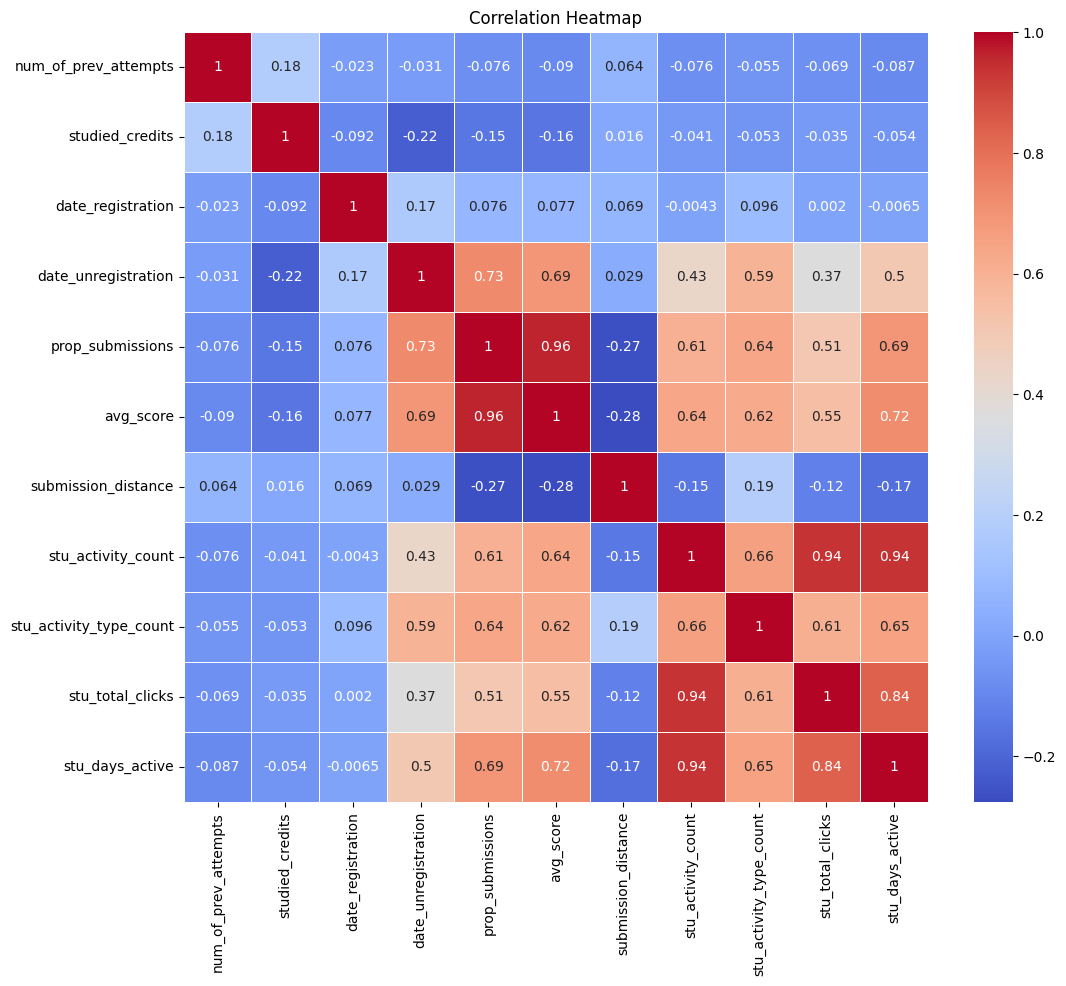

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# correlation matrix
correlation_matrix = model.corr()

# heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()



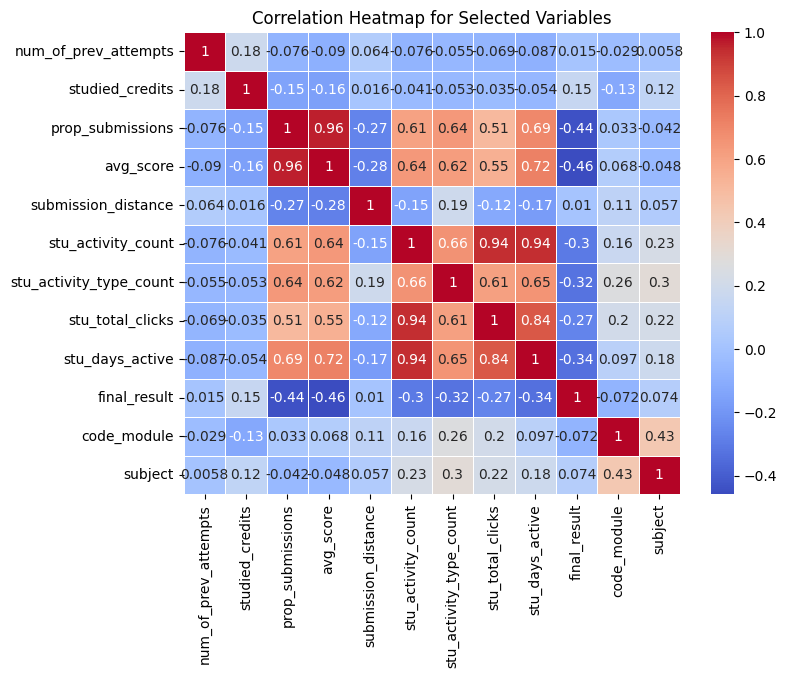

In [21]:

# select variables - numeric and those which will be kept 

selected_vars = ['num_of_prev_attempts', 'studied_credits', 'prop_submissions', 'avg_score',
                 'submission_distance', 'stu_activity_count', 
                 'stu_activity_type_count', 'stu_total_clicks',
                 'stu_days_active']

non_numeric_cols = ['final_result', 'code_module', 'subject']

# Select the relevant columns from the dataset
data_subset = model[selected_vars + non_numeric_cols].copy()

# non-numeric column 'final_result'
data_subset['final_result'] = data_subset['final_result'].astype('category').cat.codes
data_subset['code_module'] = data_subset['code_module'].astype('category').cat.codes
data_subset['subject'] = data_subset['subject'].astype('category').cat.codes

# correlation matrix for selected variables
selected_corr_matrix = data_subset.corr()

# heatmap for selected variables
plt.figure(figsize=(8, 6))
sns.heatmap(selected_corr_matrix, annot = True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap for Selected Variables')
plt.show()



There is some correlation between the engagement features and the target variable, but not as much as I would have expected.  The highest correlation is with prop_submissions, which is the proportion of assessments submitted by the student.  This is to be expected as the more assessments submitted, the more likely the student is to pass.  The next highest correlation is with avg_score, which is the average score of the assessments submitted.  This is also to be expected as the higher the average score, the more likely the student is to pass.

There is evidence of multicollinearity between the engagement features, but this is to be expected as they are all related to each other - for example student_activity_count is very highly correlated with sutdent_total_clicks and student_days_active.



In [47]:

# correlation values
correlation_values = selected_corr_matrix.unstack().sort_values(ascending=False).reset_index()
correlation_values.columns = ['Feature 1', 'Feature 2', 'Correlation']

# summary statistics 
correlation_summary = correlation_values.describe()

# print summary
print(correlation_summary)

#correlation_values = correlation_values[correlation_values['Feature 1'] != correlation_values['Feature 2']]
#correlation_values.sort_values(by='Correlation', ascending=False).head(10)


       Correlation
count   144.000000
mean      0.213899
std       0.413989
min      -0.457942
25%      -0.073105
50%       0.071149
75%       0.606149
max       1.000000


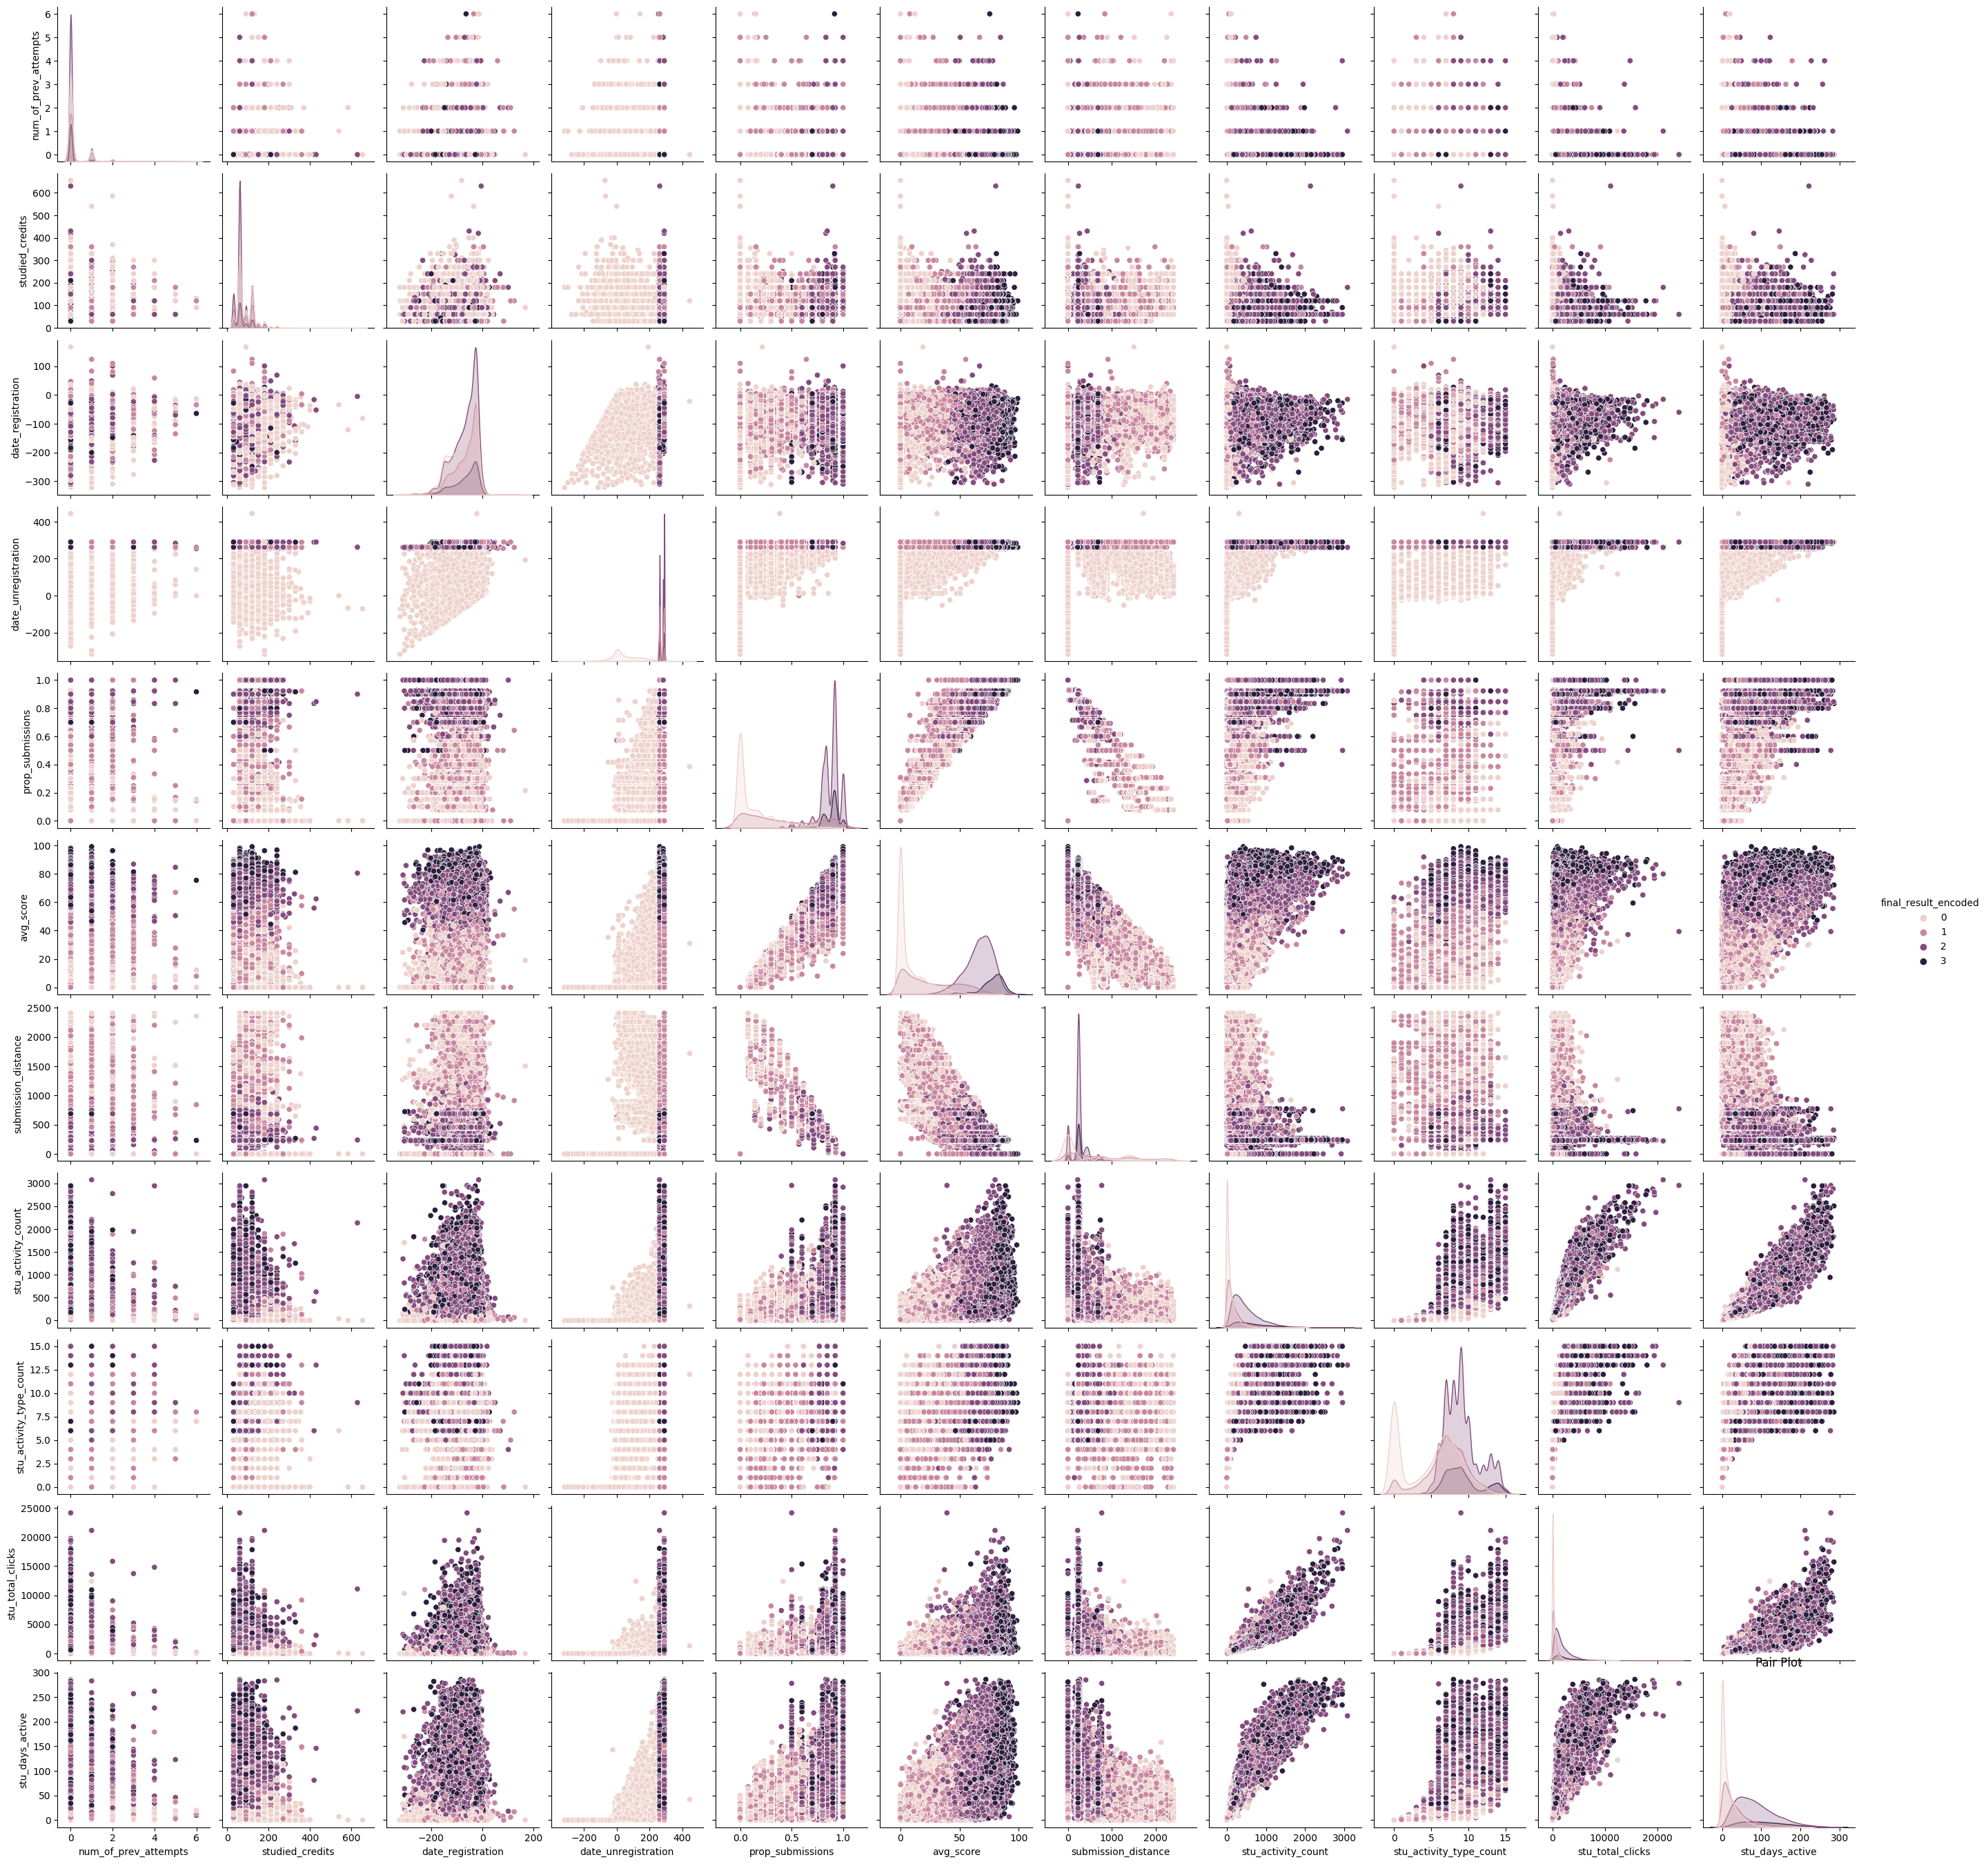

In [20]:
# 'final_result' column ordinal encoding
model_copy = model.copy()
ordinal_mapping = {'Withdrawn': 0, 'Fail': 1, 'Pass': 2, 'Distinction': 3}
model_copy['final_result_encoded'] = model_copy['final_result'].map(ordinal_mapping)

# pair plot
sns.pairplot(model_copy, hue='final_result_encoded')
plt.title('Pair Plot')
plt.show()

Pair plots show that there are patterns in the data - some linear, some potentially loglinear.  The distributions are not normal, but this is to be expected with this type of data.

There is more work to be done on the data, but I will start with this model and see how it performs.

#### Variable Inflation Factor

Variance Inflation Factor (VIF) measures multicollinearity - essentially the extent to which a predictor variable can be explained by other predictor variables.  I am expecting there to be some significant multicollinearity because of the feature creation and the relation between the features.  The method is a manual approach where $VIF = 1 / (1 - R^2)$ where $R^2$ is the coefficient of determination from simple linear regression.

In [22]:
# one-hot encode 'code_module' and 'subject'
model_copy = pd.get_dummies(model_copy, columns=['code_module', 'subject'], drop_first=True)


In [26]:

import statsmodels.api as sm



# constant column for intercept in VIF calculation
X = sm.add_constant(model_copy.drop(columns=['final_result']))

#  VIF
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [1 / (1 - sm.OLS(X[col], X.drop(columns=[col])).fit().rsquared) if sm.OLS(X[col], X.drop(columns=[col])).fit().rsquared != 1 else float('inf') for col in X.columns]

# filter out features with infinite VIF
vif_filtered = vif[vif['VIF'] != float('inf')]

# 
print(vif_filtered.sort_values(by='VIF', ascending=False))



                    Feature        VIF
0                     const  61.158889
8        stu_activity_count  26.506949
6                 avg_score  19.359526
5          prop_submissions  17.682752
11          stu_days_active  12.607362
10         stu_total_clicks  10.977020
13          code_module_BBB   9.241385
12     final_result_encoded   5.542953
18          code_module_GGG   4.528957
9   stu_activity_type_count   3.987898
4       date_unregistration   3.852242
7       submission_distance   1.834026
2           studied_credits   1.236257
1      num_of_prev_attempts   1.075297
3         date_registration   1.061452


In [28]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor



# drop target variable 
X = model_copy.drop(columns=['final_result'])

# calculate VIF
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# filter out features with infinite VIF
vif_filtered = vif[vif['VIF'] != float('inf')]

print(vif_filtered.sort_values(by='VIF', ascending=False))


                    Feature        VIF
4          prop_submissions  51.561744
5                 avg_score  51.440618
7        stu_activity_count  46.247630
10          stu_days_active  25.391458
8   stu_activity_type_count  21.396158
9          stu_total_clicks  16.521228
3       date_unregistration  15.818449
11     final_result_encoded  14.159900
1           studied_credits   5.219919
12          code_module_BBB   3.726058
6       submission_distance   3.032116
2         date_registration   3.016780
17          code_module_GGG   1.696100
0      num_of_prev_attempts   1.199505


c:\Users\zoona\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


There are some high values - as expected - which indicates multicollinear features.  Of concern, student_activity_count, average_score, proportion_submissions, active_days, total_clicks - basically all of them!

Quick look at regularisation...Ridge, Lasso.

#### Regularisation - probably needs to be considered.

In [49]:
import pandas as pd
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import OrdinalEncoder

# drop columns from the 'model' dataset
model_filtered = model.drop(columns=['code_module', 'date_registration', 'date_unregistration'])

# one-hot encoding
model_filtered_encoded = pd.get_dummies(model_filtered, columns=['subject'], drop_first=True)

#  'final_result'
ordinal_mapping = {'Withdrawn': 0, 'Fail': 1, 'Pass': 2, 'Distinction': 3}
model_filtered_encoded['final_result_encoded'] = model_filtered_encoded['final_result'].map(ordinal_mapping)

# split the dataset 
X = model_filtered_encoded.drop(columns=['final_result', 'final_result_encoded'])
y = model_filtered_encoded['final_result_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=567)

# scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  PCA
pca = PCA(n_components=0.95)  #explained variance threshold (e.g., 95%)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Ridge regression model 
ridge = Ridge(alpha=1.0)  # You can adjust the value of 'alpha' to control the regularization strength
ridge.fit(X_train_pca, y_train)

# Lasso regression model
lasso = Lasso(alpha=1.0)  # You can adjust the value of 'alpha' to control the regularization strength
lasso.fit(X_train_pca, y_train)

# performance of the models 
ridge_score = ridge.score(X_test_pca, y_test)
lasso_score = lasso.score(X_test_pca, y_test)

print("Ridge Regression R^2 Score:", ridge_score)
print("Lasso Regression R^2 Score:", lasso_score)




Ridge Regression R^2 Score: 0.7134872434799866
Lasso Regression R^2 Score: 0.3238024635390596
